# 6.5: Unsupervised Machine Learning: Clustering

### 1. Install libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensures the charts are displayed in the notebook

%matplotlib inline

In [3]:
# Define path

path = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data'

### 2. Import data set and conduct any necessary cleaning, manipulations, and reprocessing

In [4]:
# Import cleaned data set 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Data_clean2.csv'))

In [5]:
df.shape

(142390, 20)

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,1.0,Julian Sims under investigation: Four Shot and...,0::20,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,1.0,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,1.0,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [7]:
# Remove unnamed column

df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
address                      object
n_killed                      int64
n_injured                     int64
incident_url                 object
source_url                   object
incident_characteristics     object
location_description         object
n_guns_involved             float64
notes                        object
participant_age              object
participant_gender           object
participant_relationship     object
participant_status           object
participant_type             object
sources                      object
dtype: object

In [12]:
# Creating new dataframe and removing categorical values

df2 = df.drop(columns=['date', 'state', 'city_or_county', 'address', 'incident_url', 'source_url', 'incident_characteristics', 'location_description', 'notes', 'participant_age', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type', 'sources'])

In [13]:
df2.head()

,incident_id,n_killed,n_injured,n_guns_involved
0,461105,0,4,1.0
1,460726,1,3,1.0
2,478855,1,3,2.0
3,478925,4,0,1.0
4,478959,2,2,2.0


In [17]:
# Remove the decimal point from 'n_guns_involved'

df2['n_guns_involved'] = df2['n_guns_involved'].astype('int64')

### 3. Use the elbow technique for clustering using k-Means

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.1848620437095092e+16,
 -2974272491111984.0,
 -1327516706455967.2,
 -734223169528561.1,
 -456794327293316.3,
 -304157738704763.25,
 -220575769881022.06,
 -171412030089950.0,
 -142071731608536.2]

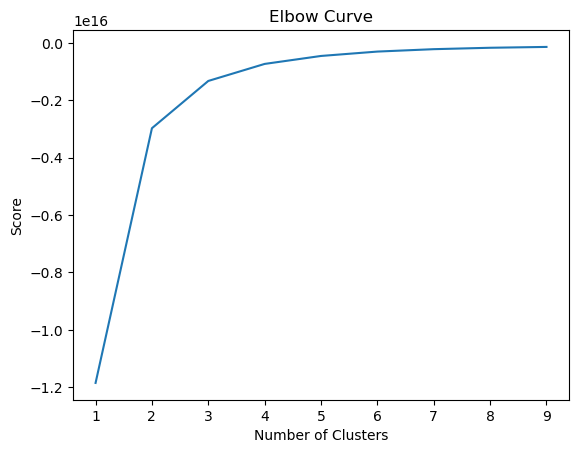

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters i'll choose in my k-means algorithm will be the number 4. This is because 4 clusters is the breaking point of the curve and when it begins to flatten out.

### 4. Run the k-means algorithm

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [27]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4)

### 5. Attach a new column to your dataframe with the resulting clusters 

In [28]:
df2['clusters'] = kmeans.fit_predict(df2)

In [29]:
df2.head()

,incident_id,n_killed,n_injured,n_guns_involved,clusters
0,461105,0,4,1,1
1,460726,1,3,1,1
2,478855,1,3,2,1
3,478925,4,0,1,1
4,478959,2,2,2,1


In [30]:
df2['clusters'].value_counts()

1    37993
0    36734
2    34925
3    32738
Name: clusters, dtype: int64

### 6. Create a few different visualizations using your clustered data

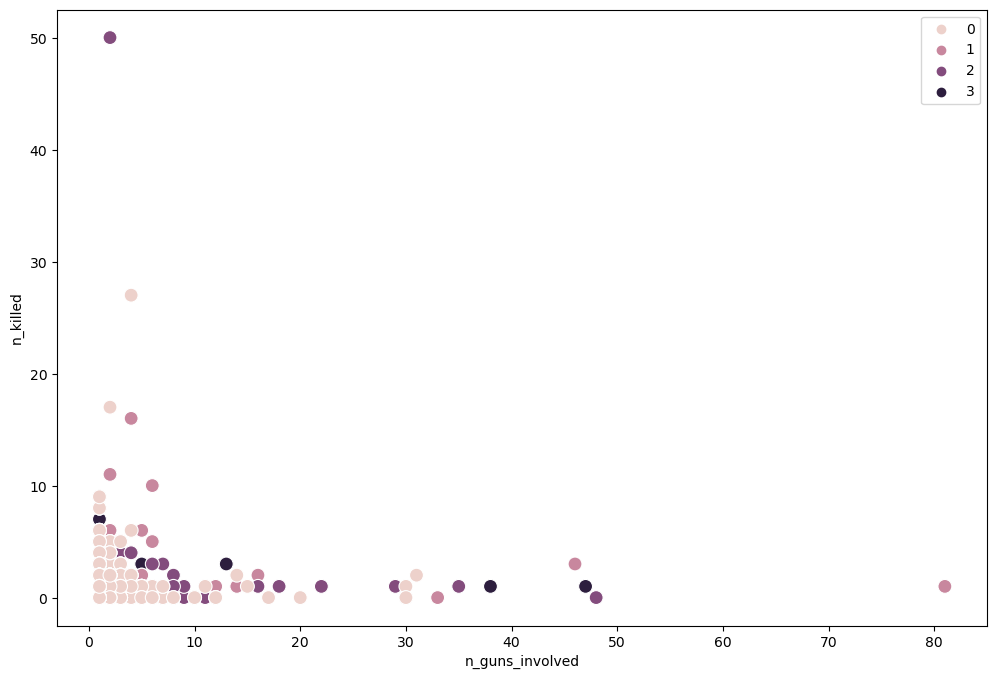

In [34]:
# Plot the clusters for the "n_guns_involved" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['n_guns_involved'], y=df2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_guns_involved') # Label x-axis
plt.ylabel('n_killed') # Label y-axis
plt.show()

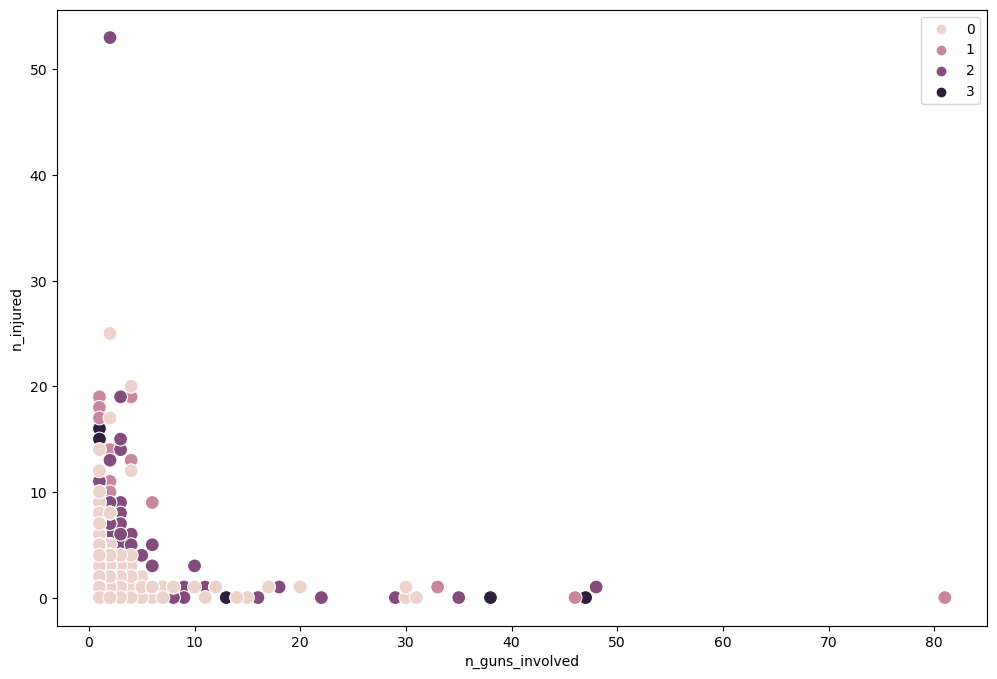

In [35]:
# Plot the clusters for the "n_guns_involved" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['n_guns_involved'], y=df2['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_guns_involved') # Label x-axis
plt.ylabel('n_injured') # Label y-axis
plt.show()

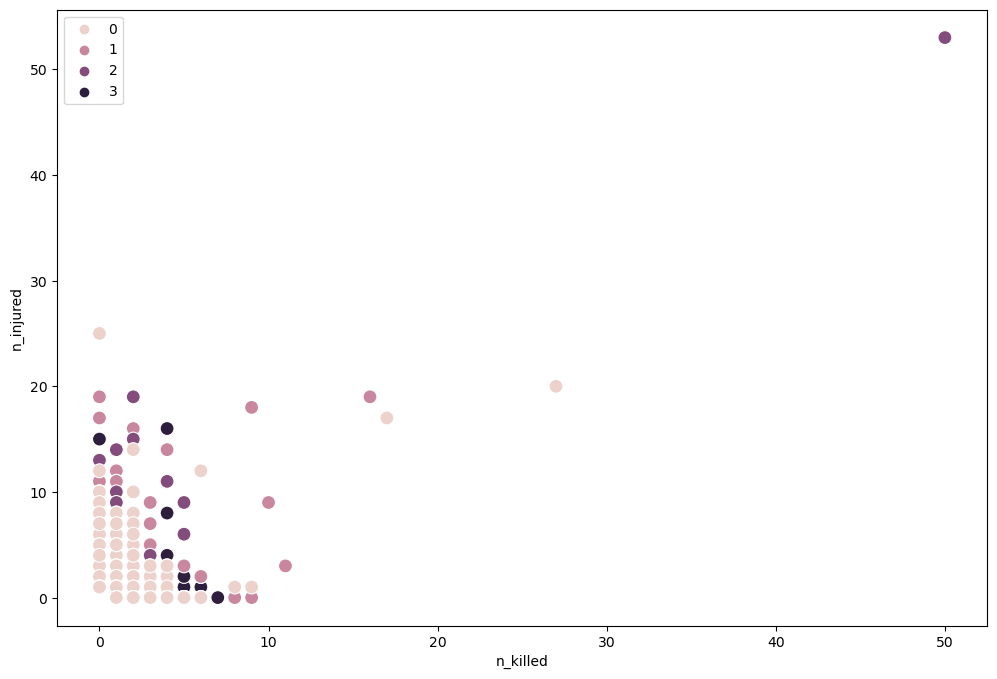

In [36]:
# Plot the clusters for the "n_killed" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['n_killed'], y=df2['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_killed') # Label x-axis
plt.ylabel('n_injured') # Label y-axis
plt.show()

The cluster 0 which is in that light pink color is the most populated cluster for all three charts. 

### 7. Calculate the descriptive statistics for your clusters

In [37]:
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'dark pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
df2.groupby('cluster').agg({'n_guns_involved':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'n_killed':['mean', 'median']})

n_guns_involved        n_injured         n_killed       
                       mean median      mean median      mean median
cluster                                                             
dark pink          1.036665    1.0  0.858737    1.0  0.411549    0.0
dark purple        1.012707    1.0  0.812420    1.0  0.448347    0.0
pink               1.040562    1.0  0.818996    1.0  0.423776    0.0
purple             1.045641    1.0  0.833042    1.0  0.417666    0.0

The descriptive statistics is roughly around the same for each cluster type per the mean and median, there is no cluster that stands out.